**Import necessary packages/modules**

In [1]:
# Cell 1
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

**Connect this notebook to your Google Drive**

In [2]:
# Cell 2
drive.mount("/content/gdrive", force_remount=True)
notebook_path = Path("/content/gdrive/MyDrive/wdts-psi")
notebook_path /= Path("Session 05 - Computational Biology and Chemistry")
notebook_path

Mounted at /content/gdrive


PosixPath('/content/gdrive/MyDrive/wdts-psi/Session 05 - Computational Biology and Chemistry')

**Rehydrate/deserialize a Python dictionary from a JSON formatted text file**

In [3]:
# Cell 3
file_name = "periodic_table.json"
file_path = notebook_path / file_name
with Path.open(file_path, "rb") as f_in:
    periodic_table = json.load(f_in)
periodic_table["elements"][0]["name"]

'Hydrogen'

**Create a Python `list` of elements sorted by group, then period, then atomic number**
1. Use `for` loops to range over every group # and period #
2. Extract the dictionary values for those keys (elements) that match the current group # and period #
3. Append the matching element to the growing `list` of elements
4. Each item in the `elements` list is a <u>tuple</u> containing:\
a. A `string` label formed by of its atomic symbol, a hyphen, and its atomic number\
b. The element's melting point (or $-∞$ if not melting point is not known)\
c. The element's boiling point (or $∞$ if not boiling point is not known)

In [4]:
# Cell 4
elements: list = []
for group in range(1, 19):
    for period in range(1, 8):
        for k, v in enumerate(periodic_table["elements"]):
            if group == int(v["group"]) and period == int(v["period"]):
                elements.append(
                    (
                        f"{v['symbol']}-{v['number']}",
                        float(v["melt"] or -np.inf),
                        float(v["boil"] or np.inf),
                    ),
                )
pd.DataFrame(elements[:10], columns=["Element", "Melt", "Boil"])

,Element,Melt,Boil
0,H-1,13.990,20.271
1,Li-3,453.650,1603.000
2,Na-11,370.944,1156.090
3,K-19,336.700,1032.000
4,Rb-37,312.450,961.000
5,Cs-55,301.700,944.000
6,Fr-87,300.000,950.000
7,Be-4,1560.000,2742.000
8,Mg-12,923.000,1363.000
9,Ca-20,1115.000,1757.000


**In preperation for plotting the melting and boiling points:**
1. Create a numpy `array` from the elements `list`
2. Create a numpy `array` of the melting points, which are the 2nd item [index #1] in each tuple in the elements list
2. Create a numpy `array` of the boiling points, which are the 3rd item [index #2] in each tuple in the elements list
3. Convert both melting and boiling point values from Kelvin to Celsius

In [5]:
# Cell 5
data = np.array(elements)
melt = np.array(data[:, 1], dtype=float) - 273.15
boil = np.array(data[:, 2], dtype=float) - 273.15
pd.DataFrame(
    {
        "Element": [element[0] for element in elements[:10]],
        "Melt": melt[:10],
        "Boil": boil[:10],
    }
)

,Element,Melt,Boil
0,H-1,-259.160,-252.879
1,Li-3,180.500,1329.850
2,Na-11,97.794,882.940
3,K-19,63.550,758.850
4,Rb-37,39.300,687.850
5,Cs-55,28.550,670.850
6,Fr-87,26.850,676.850
7,Be-4,1286.850,2468.850
8,Mg-12,649.850,1089.850
9,Ca-20,841.850,1483.850


**Find the element with the <u>smallest</u> liquid range (boiling point - melting point)**
1. The variable `liquid_range` becomes an numpy `array` because $boil$ and $melt$ are both arrays
2. The function `np.argmin()` returns the index in the given array with the minimum value

In [6]:
# Cell 6
liquid_range = boil - melt
min_idx = np.argmin(liquid_range)
min_range = liquid_range[min_idx]
print(f"Smallest liquid range: {min_range:,.2f}°C is {data[min_idx, 0]}")

Smallest liquid range: 2.54°C is Ne-10


**Find the element with the <u>largest</u> liquid range**
1. The `liquid_range` array is sorted so the highest values are first
2. The function `np.argwhere().min()` returns the <u>first</u> index where the condition is true
3. Recall that elements without a known boiling point have their boiling point sent to $\infty$
4. Therefore, we need to find the <u>first</u> index where the maximum liquid range that is NOT $\infty$

In [7]:
# Cell 7
measured_liquid_range = np.array(sorted(liquid_range, reverse=True))
max_measured_idx = np.argwhere(measured_liquid_range < np.inf).min()
max_range = measured_liquid_range[max_measured_idx]
max_idx = np.argwhere(liquid_range == max_range)[0, 0]
print(f" Largest liquid range: {max_range:,.2f}°C is {data[max_idx, 0]}")

 Largest liquid range: 3,535.00°C is Np-93


**Plot the melting point and boiling point (if available) for every element sorted by group, period, atomic number**

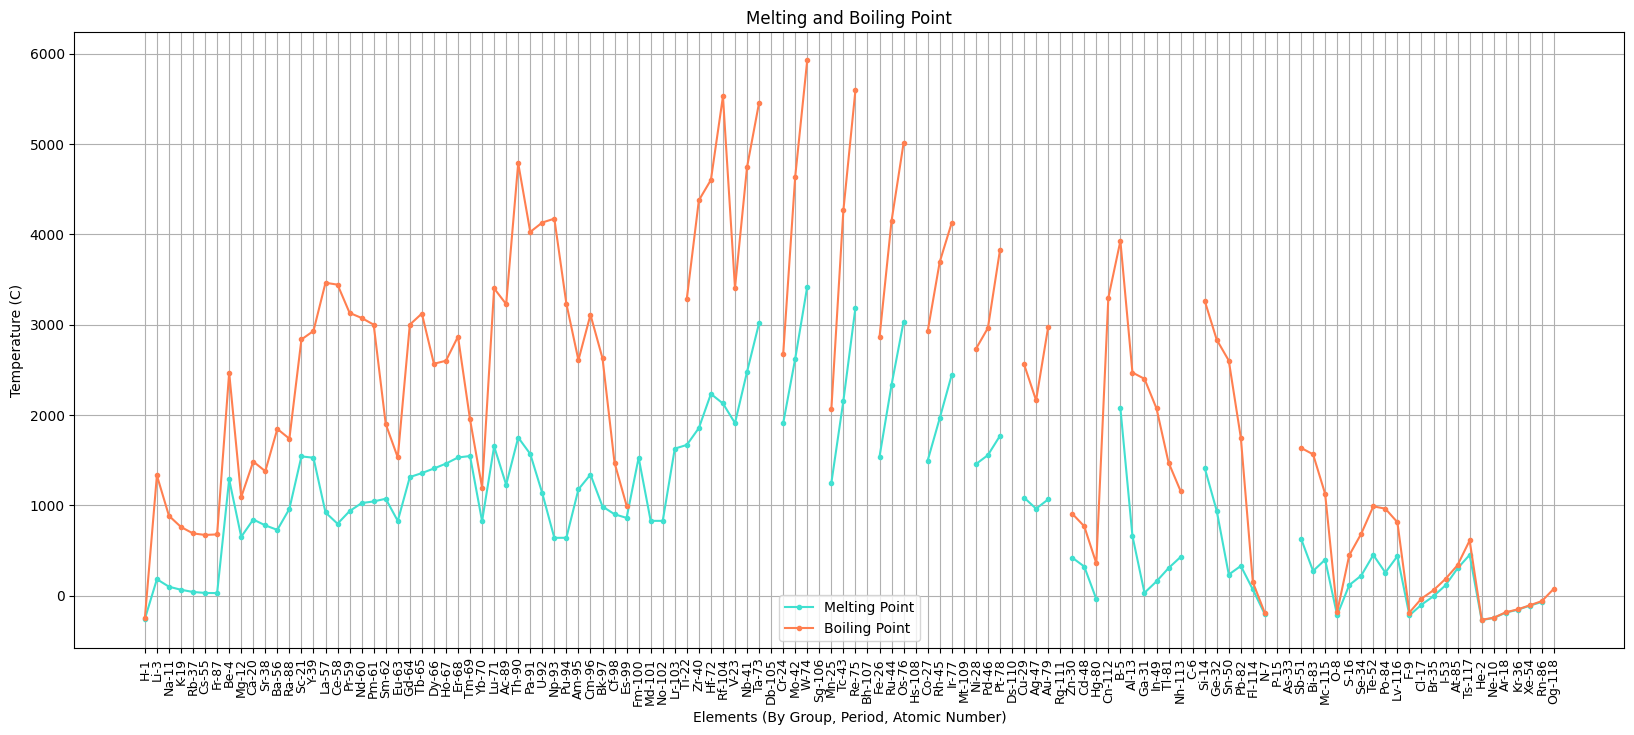

In [8]:
# Cell 8
plt.figure(figsize=(20, 8))
x = np.arange(len(elements))
plt.plot(x, melt, color="turquoise", marker=".", label="Melting Point")
plt.plot(x, boil, color="coral", marker=".", label="Boiling Point")
plt.title("Melting and Boiling Point")
plt.xlabel("Elements (By Group, Period, Atomic Number)")
plt.ylabel("Temperature (C)")
ax = plt.gca()
ax.set_xticks(x)
ax.set_xticklabels(data[:, 0], fontsize=9, rotation=90)
ax.legend(loc="lower center")
ax.grid("on")
plt.show()